# Imports

In [28]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd

# library to create visualizations
import seaborn as sns

# library to create visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.pyplot import figure

import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates



# Load Dataframe

In [13]:
#read dataframe
DataFrame = pd.read_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/DataFrames/unexploded_dataframe_11_04_22.csv") 
#set correact_datatypes for dataframe
DataFrame = set_correct_datatypes(DataFrame)
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91148 entries, 0 to 91147
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  91148 non-null  object        
 1   Date_Info              91148 non-null  datetime64[ns]
 2   URL                    91148 non-null  object        
 3   Overline               71332 non-null  object        
 4   Breadcrumb             50182 non-null  object        
 5   author                 13980 non-null  object        
 6   detailed_informations  19823 non-null  object        
 7   Zugriff_Datum          73429 non-null  datetime64[ns]
 8   News_page              91148 non-null  object        
 9   Kategorie              91144 non-null  object        
 10  tokenized_titles       91148 non-null  object        
dtypes: datetime64[ns](2), object(9)
memory usage: 7.6+ MB


In [14]:
DataFrame.head()

,Titel,Date_Info,URL,Overline,Breadcrumb,author,detailed_informations,Zugriff_Datum,News_page,Kategorie,tokenized_titles
0,Gasspeicher wenig gefüllt: Ist die Versorgung ...,2022-01-21 09:00:00,https://www.sueddeutsche.de/wirtschaft/gas-gas...,Gas,dpa,NaN,NaN,1970-01-01 00:00:00.021012022,Sueddeutsche,wirtschaft,"['Gasspeicher', 'wenig', 'gefüllt', ':', 'Ist'..."
1,Mann auf Autobahnparkplatz mutmaßlich erstochen,2022-01-21 09:00:00,https://www.sueddeutsche.de/panorama/kriminali...,Kriminalität - Hoort,dpa,NaN,NaN,1970-01-01 00:00:00.021012022,Sueddeutsche,panorama,"['Mann', 'Autobahnparkplatz', 'mutmaßlich', 'e..."
2,Sag beim Abstieg leise Service,2022-01-21 09:00:00,https://www.sueddeutsche.de/panorama/mitten-in...,"SZ-Kolumne ""Mitten in ...""",NaN,"Von Thomas Balbierer, Max Fluder und Karin Janker",Wenn ein dänischer Tourist in den bayerischen ...,1970-01-01 00:00:00.021012022,Sueddeutsche,panorama,"['Sag', 'beim', 'Abstieg', 'leise', 'Service']"
3,Ein Imam unter Verdacht,2022-01-21 08:58:00,https://www.sueddeutsche.de/politik/belgien-mo...,Molenbeek,NaN,"Von Josef Kelnberger, Brüssel",Belgien entzieht einem der bekanntesten muslim...,1970-01-01 00:00:00.021012022,Sueddeutsche,politik,"['Ein', 'Imam', 'Verdacht']"
4,Schnee und Eis: Mehrere Unfälle wegen glatter ...,2022-01-21 08:58:00,https://www.sueddeutsche.de/panorama/schnee-un...,NaN,NaN,NaN,Video\n \n ...,1970-01-01 00:00:00.021012022,Sueddeutsche,panorama,"['Schnee', 'Eis', ':', 'Mehrere', 'Unfälle', '..."


# Load exploded dataframe

In [20]:
#read dataframe
exploded_DataFrame = pd.read_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/DataFrames/exploded_dataframe_11_04_22.csv") 
#set correact_datatypes for dataframe
DataFrame = set_correct_datatypes(DataFrame)
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91148 entries, 0 to 91147
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  91148 non-null  object        
 1   Date_Info              91148 non-null  datetime64[ns]
 2   URL                    91148 non-null  object        
 3   Overline               71332 non-null  object        
 4   Breadcrumb             50182 non-null  object        
 5   author                 13980 non-null  object        
 6   detailed_informations  19823 non-null  object        
 7   Zugriff_Datum          73429 non-null  datetime64[ns]
 8   News_page              91148 non-null  object        
 9   Kategorie              91144 non-null  object        
 10  tokenized_titles       91148 non-null  object        
dtypes: datetime64[ns](2), object(9)
memory usage: 7.6+ MB


# EDA

In [15]:
DataFrame["Kategorie"].value_counts()[:20]

panorama             15913
sport                14457
bayern & muenchen    13900
politik              12835
wirtschaft            9843
gesundheit            5151
kultur                3824
ausland               3608
Entertainment         3057
wissenschaft          2714
karriere               717
bildung                689
service                661
netzwelt               527
medien                 389
projekte               290
kolumne                257
mobilität              248
reise                  234
geschichte             187
Name: Kategorie, dtype: int64

# Plot sizes

In [16]:
# define size
sns.set(rc={'figure.figsize':(40,20)})

# Functions for analysis

In [64]:
def find_most_frequent_keyWord_in_period(dataframe, start_date,end_date):
    test_df = dataframe.copy()
    # 1. dataframe auf datum begrenzen 
    date_mask = (test_df['Date_Info'] > start_date) & (test_df['Date_Info'] <= end_date)
    test_df = test_df.loc[date_mask]
    # 2. value_counts  
    print(test_df["tokenized_titles"].value_counts()[:20])
    
    
    
start_date ="2022-03-08"
end_date =  "2022-03-15"
find_most_frequent_keyWord_in_period(exploded_DataFrame, start_date, end_date)

Ukraine            223
Krieg              146
Russland           127
mehr               114
wegen               81
Mann                73
verletzt            73
Putin               71
steigt              62
Mehr                58
Polizei             57
Euro                55
Berlin              54
fordert             53
Corona              53
Deutschland         50
Flüchtlinge         50
zurück              46
Corona-Inzidenz     46
ab                  45
Name: tokenized_titles, dtype: int64


# Categorie over time - Line Graph 

## Plot single category

In [ ]:
plot =plot_categorie_over_time(DataFrame, "karriere", False,False)

## Plot multiple categories

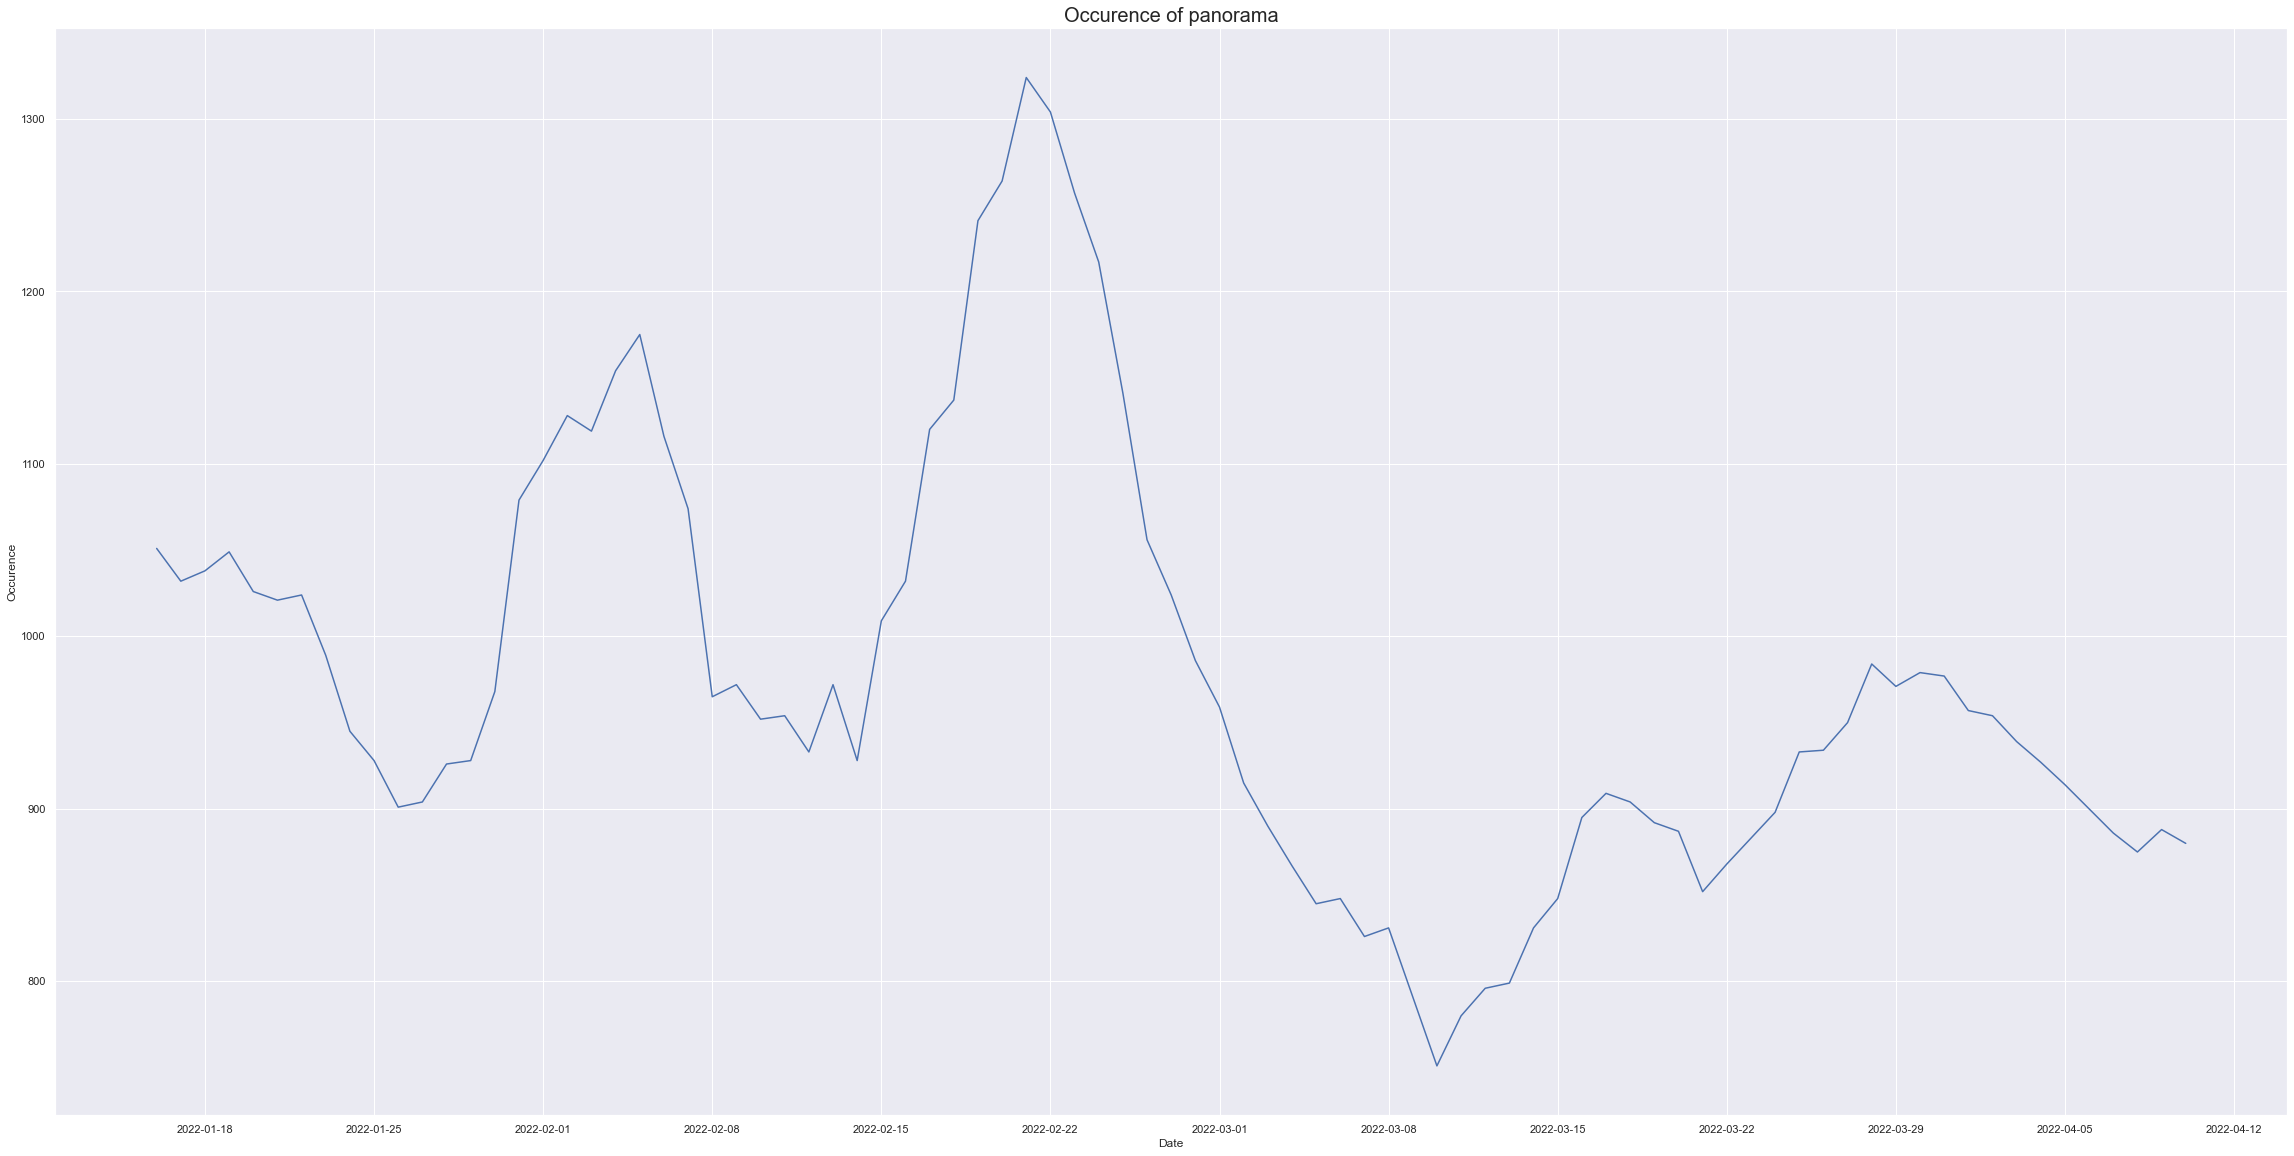

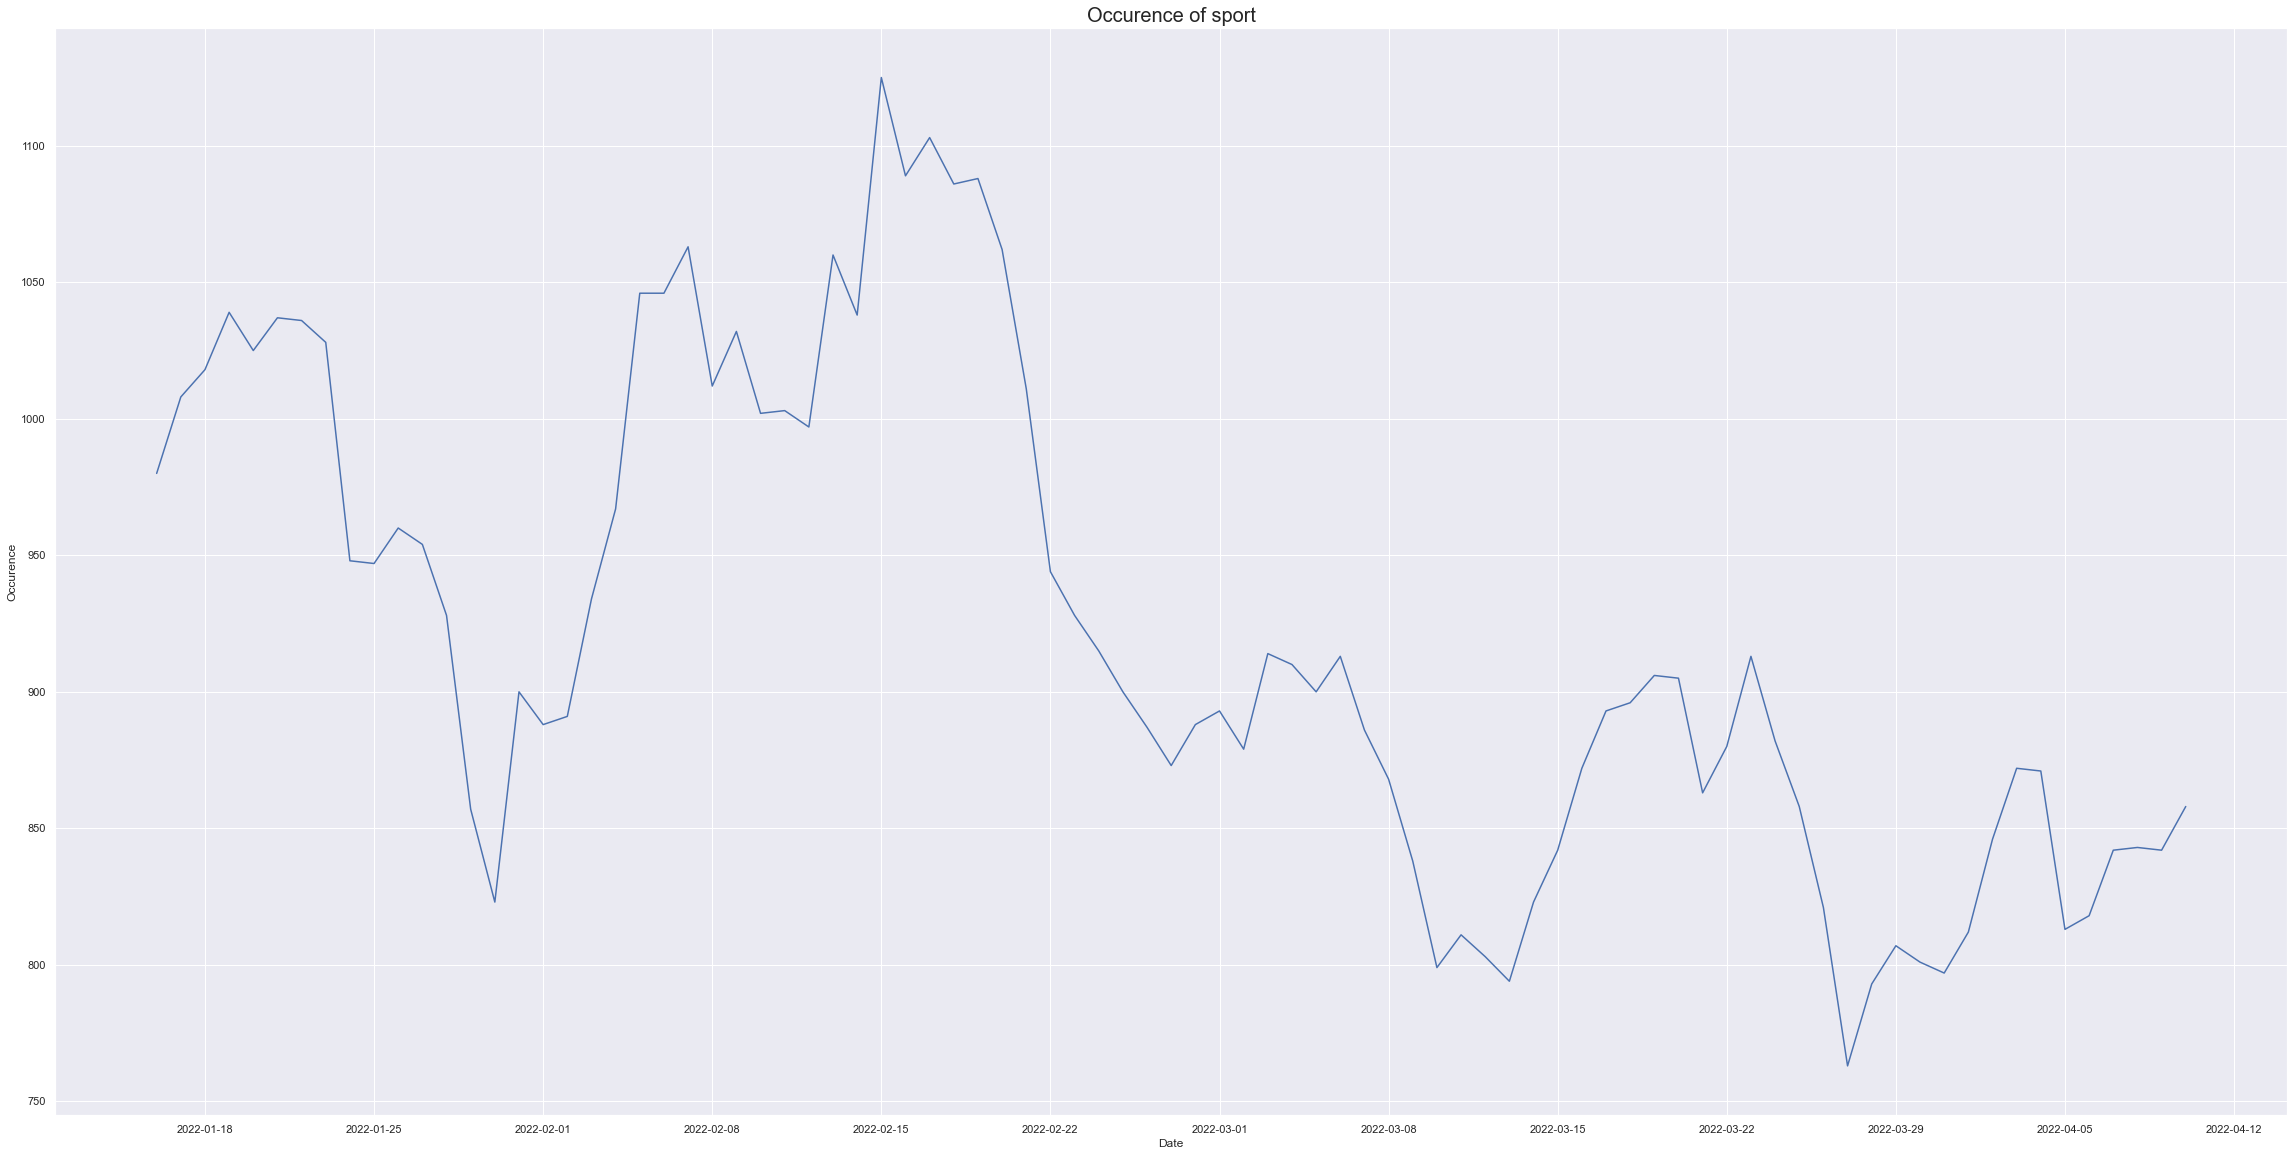

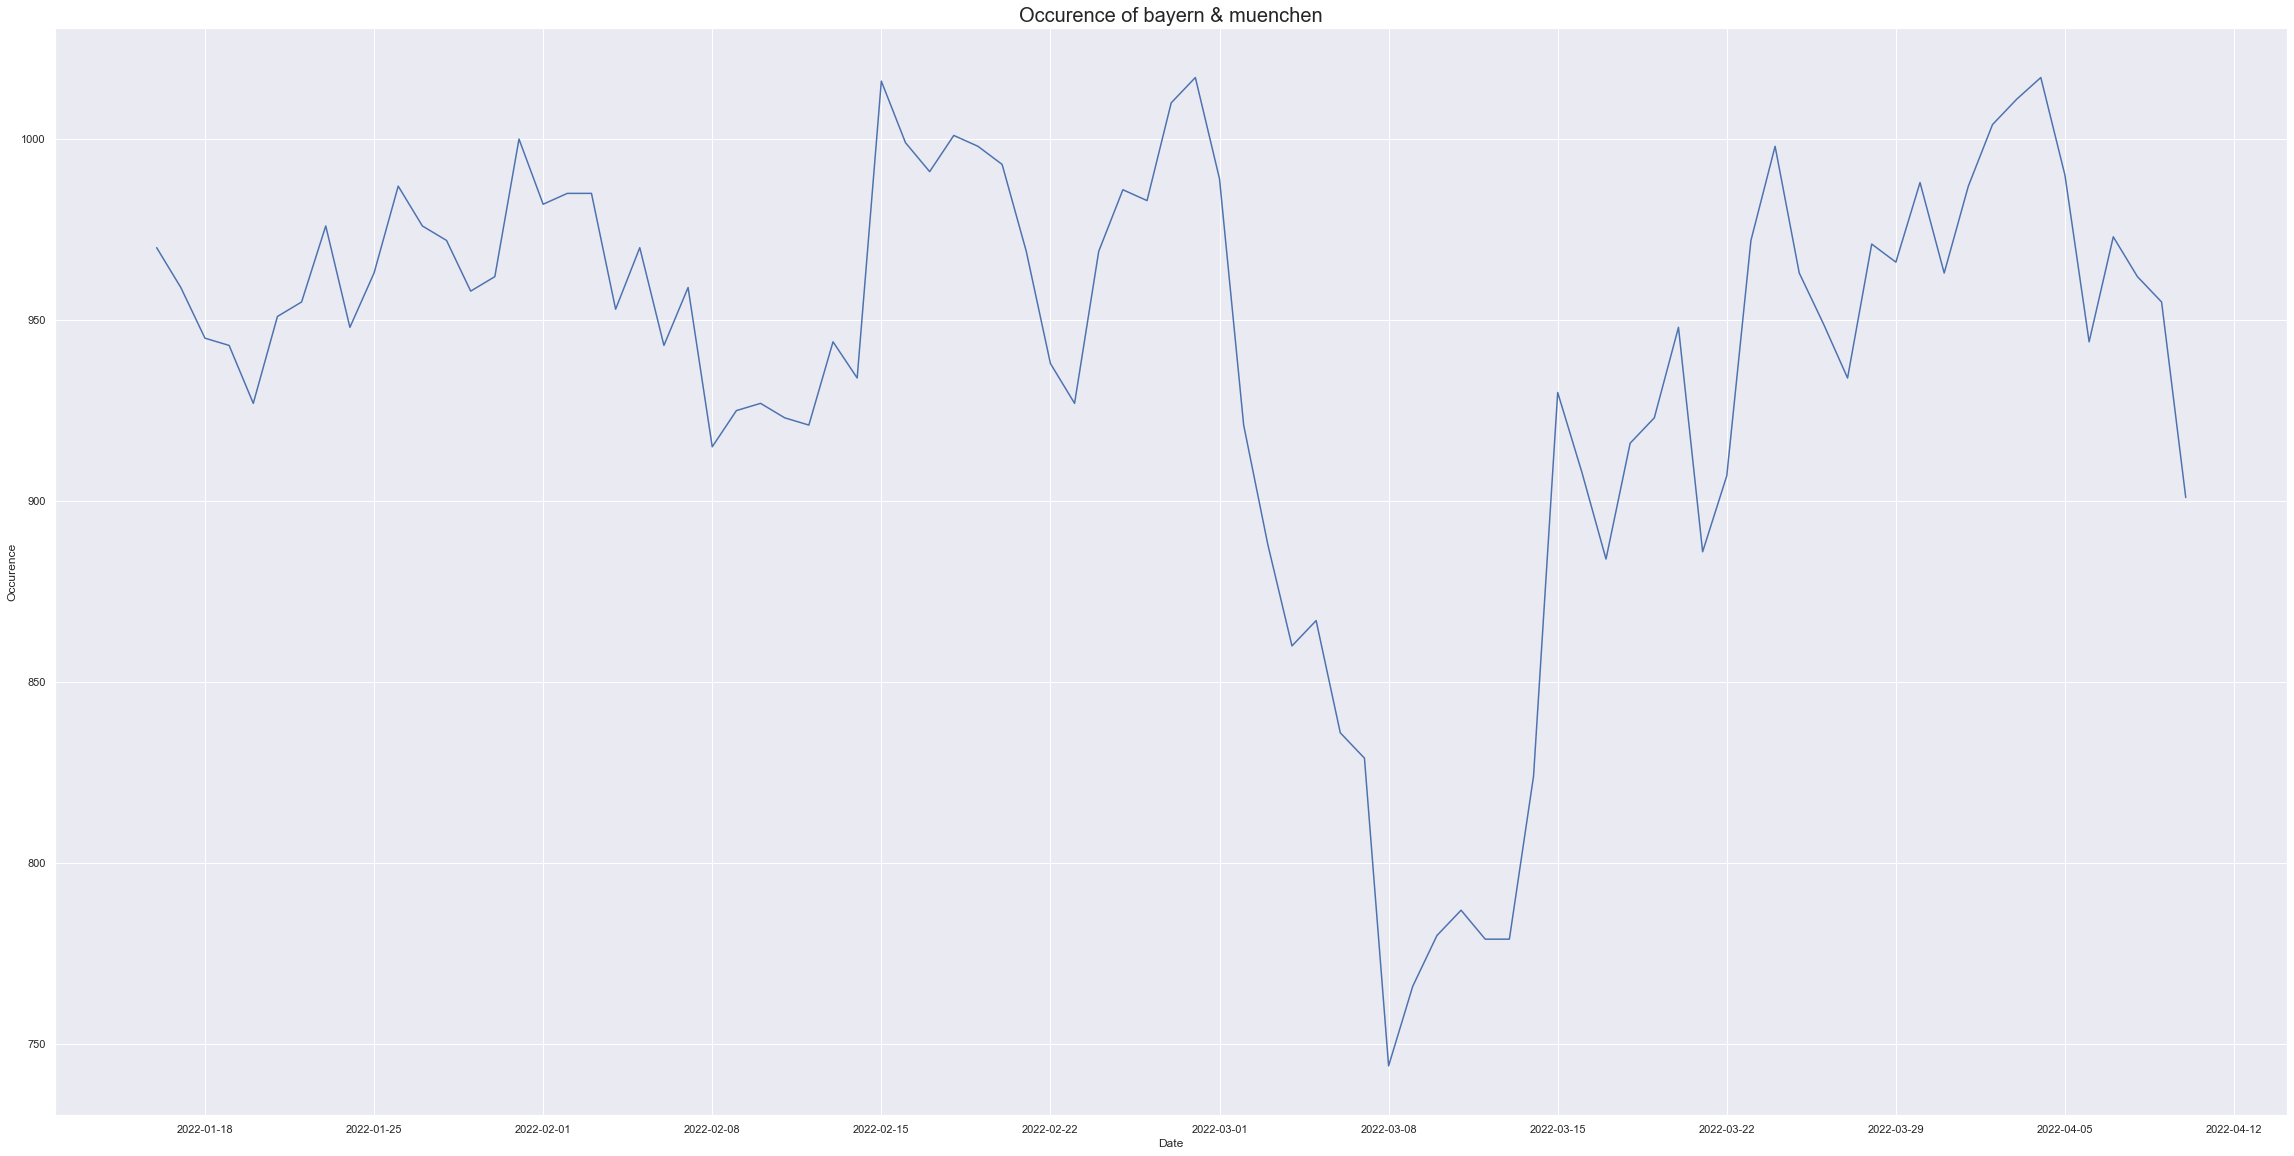

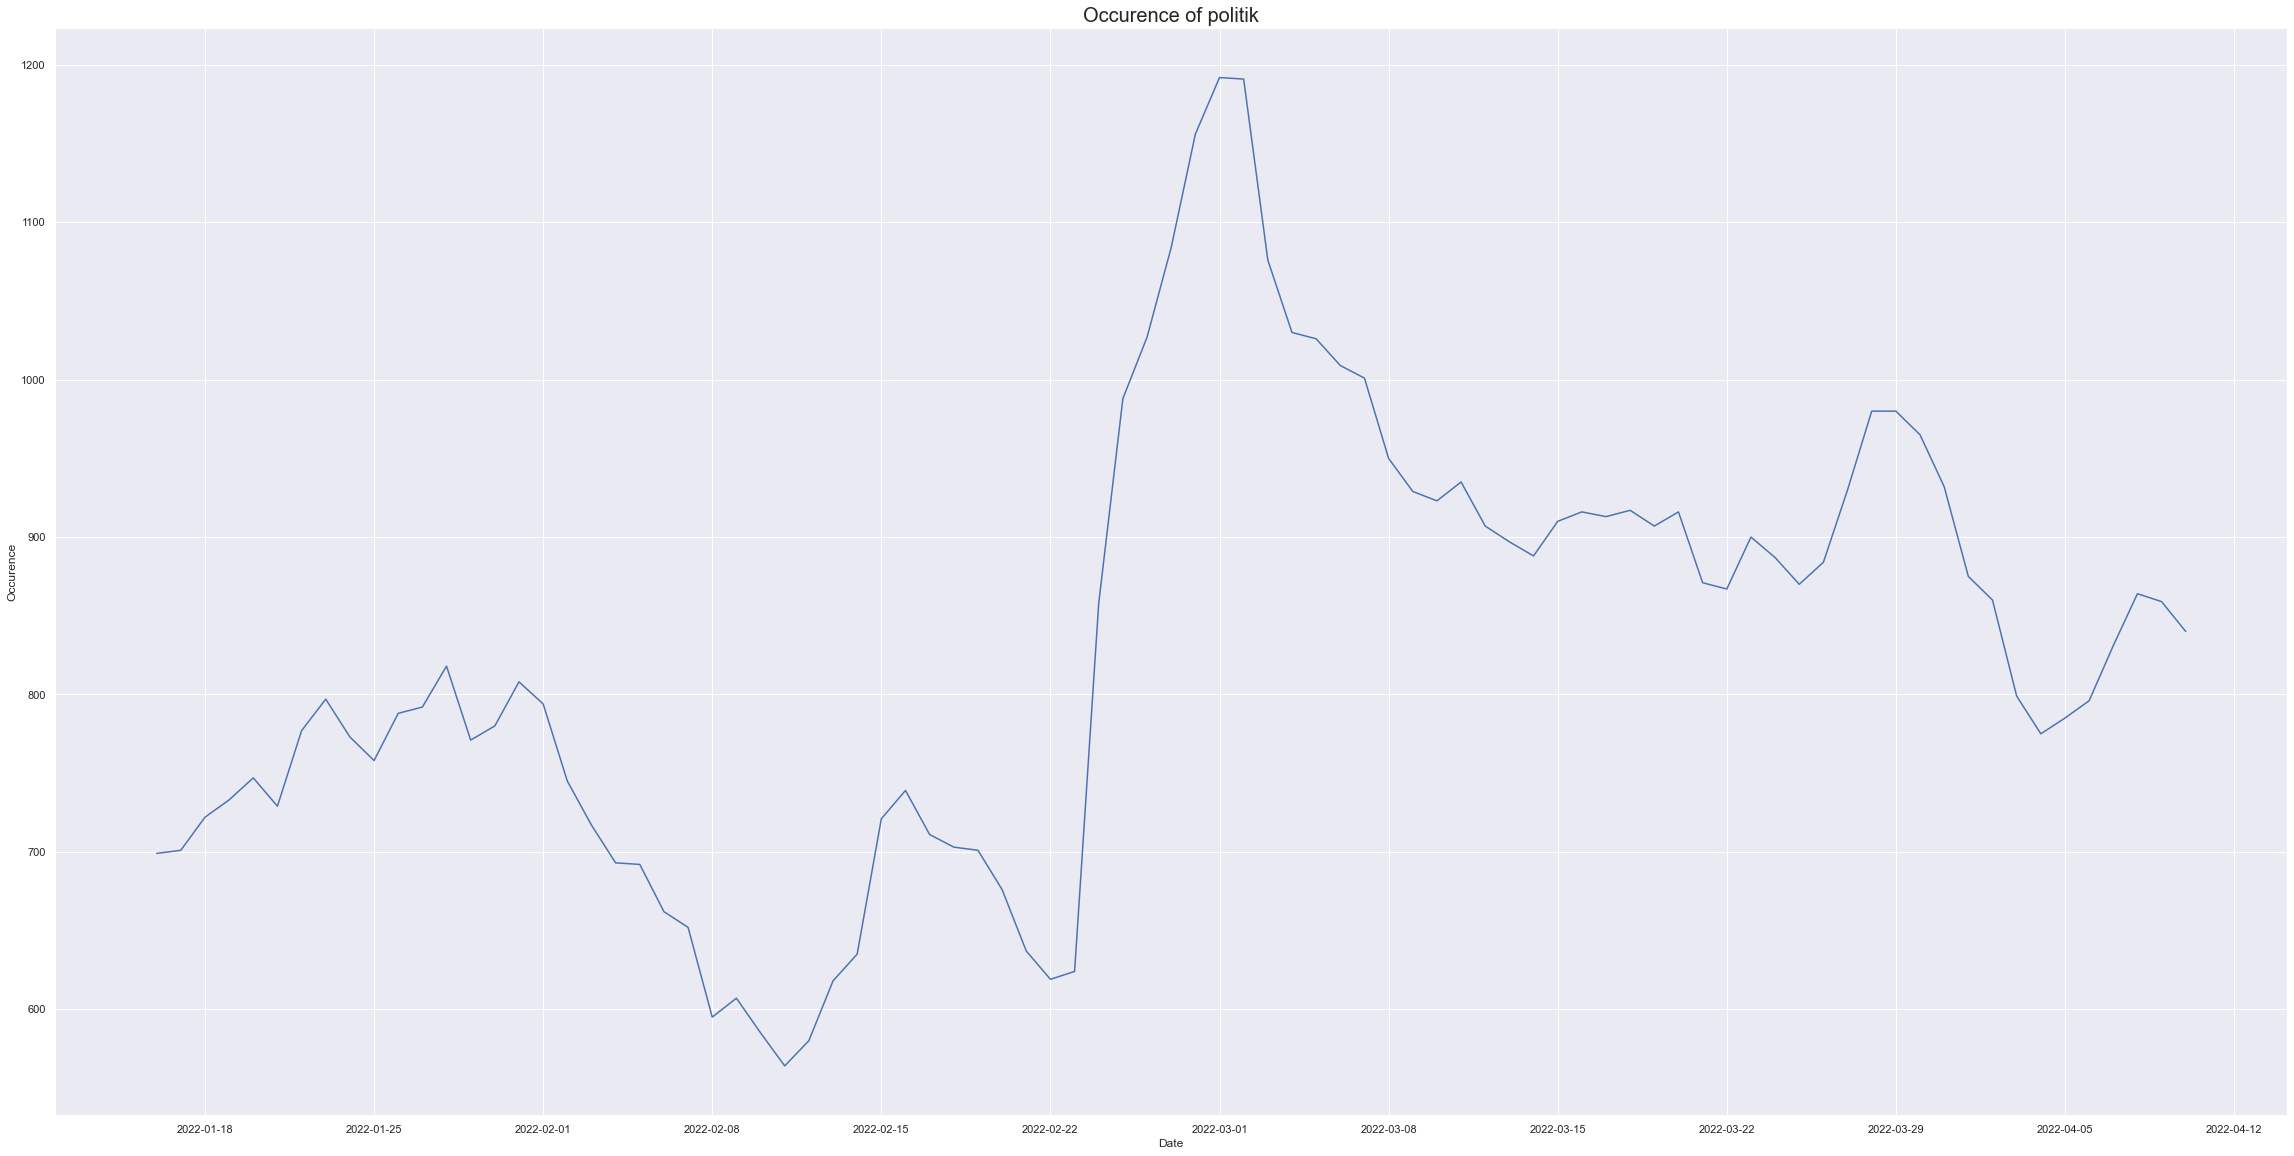

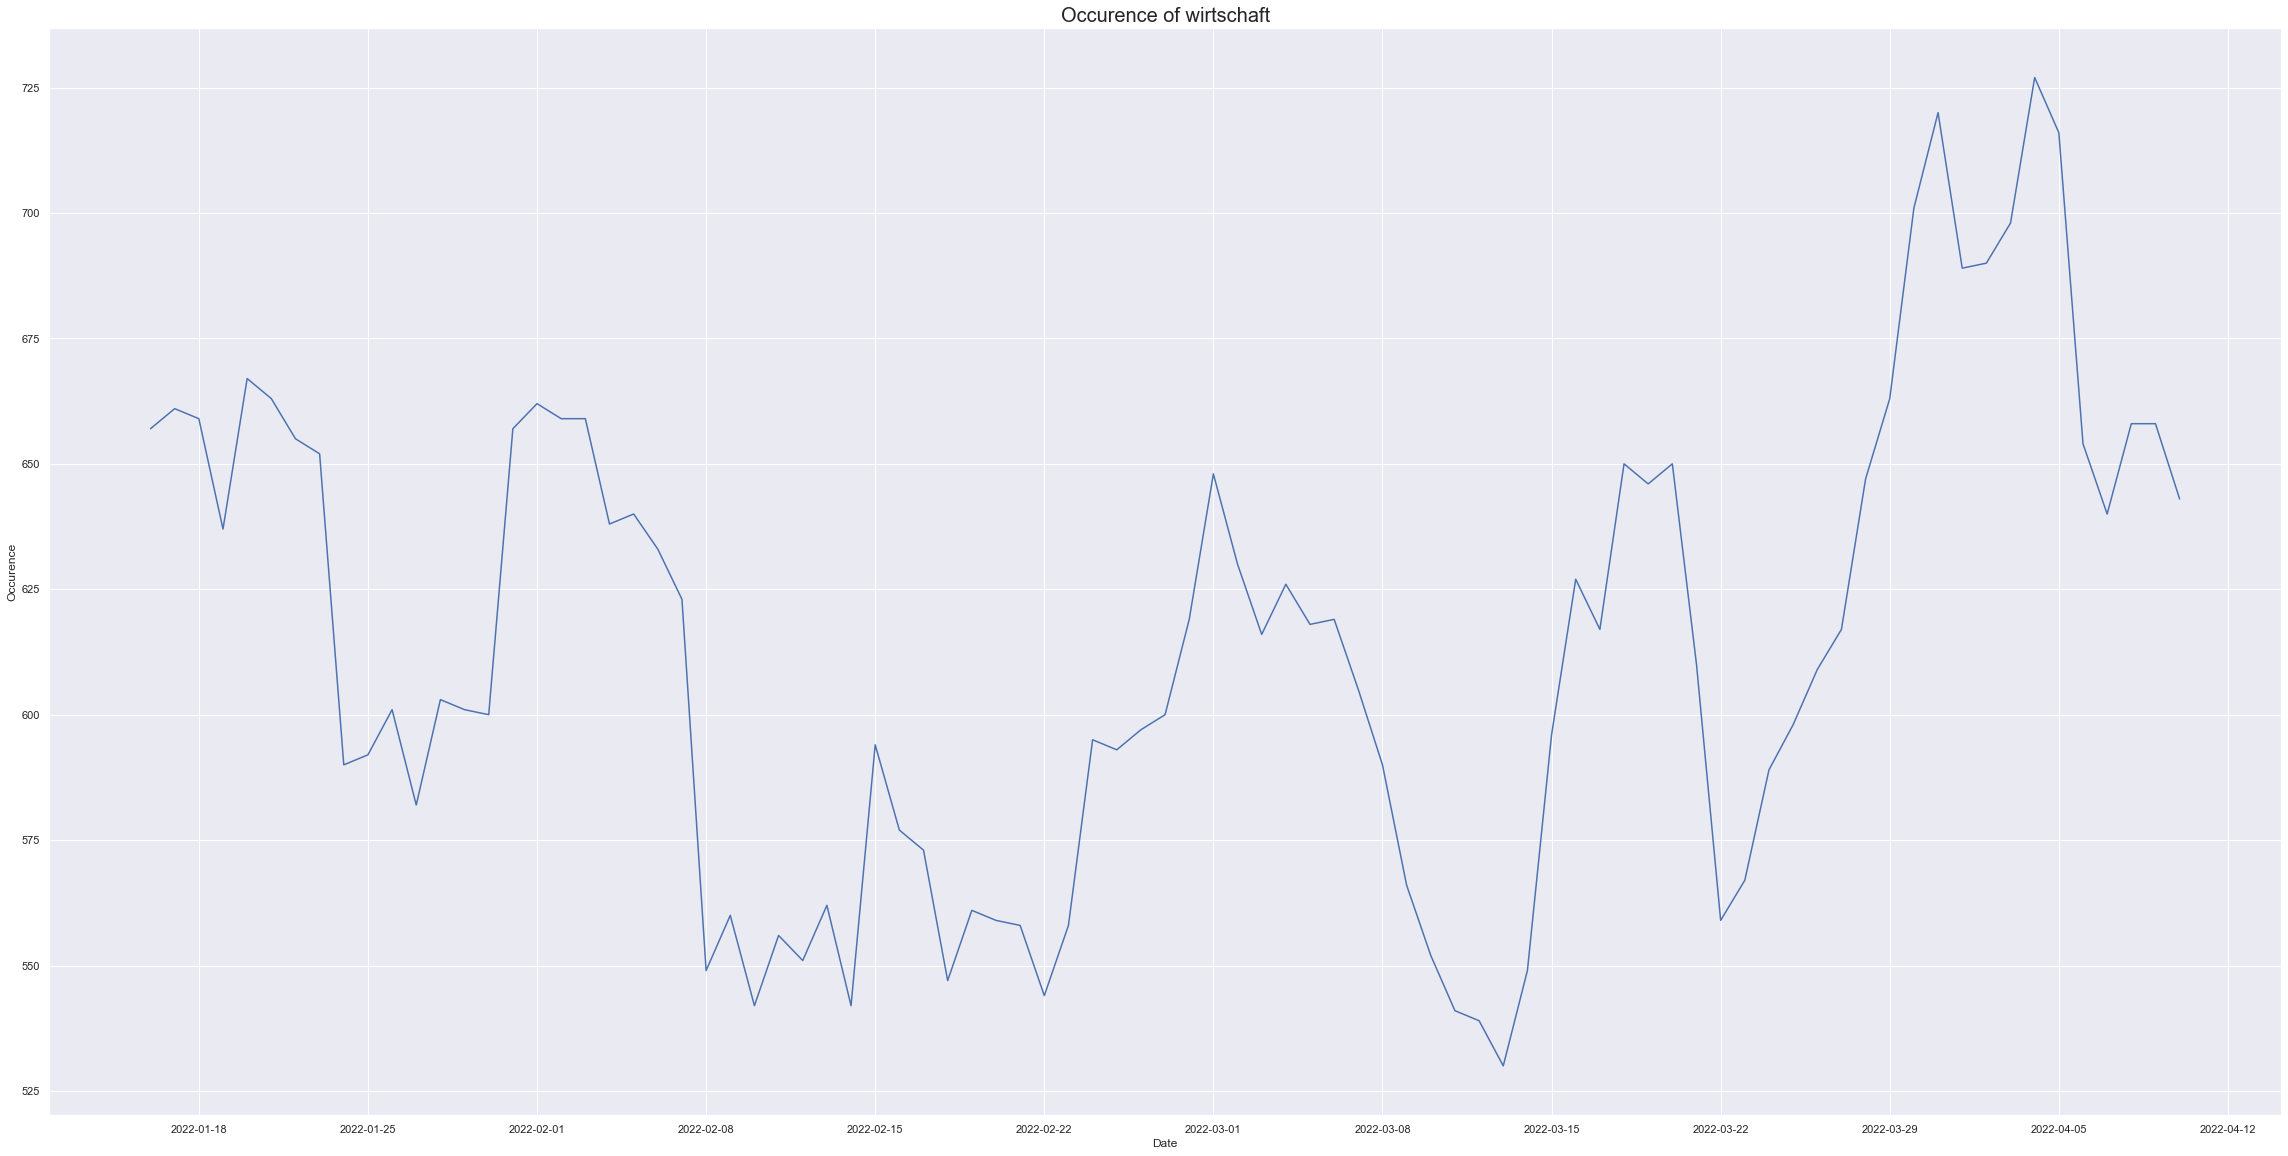

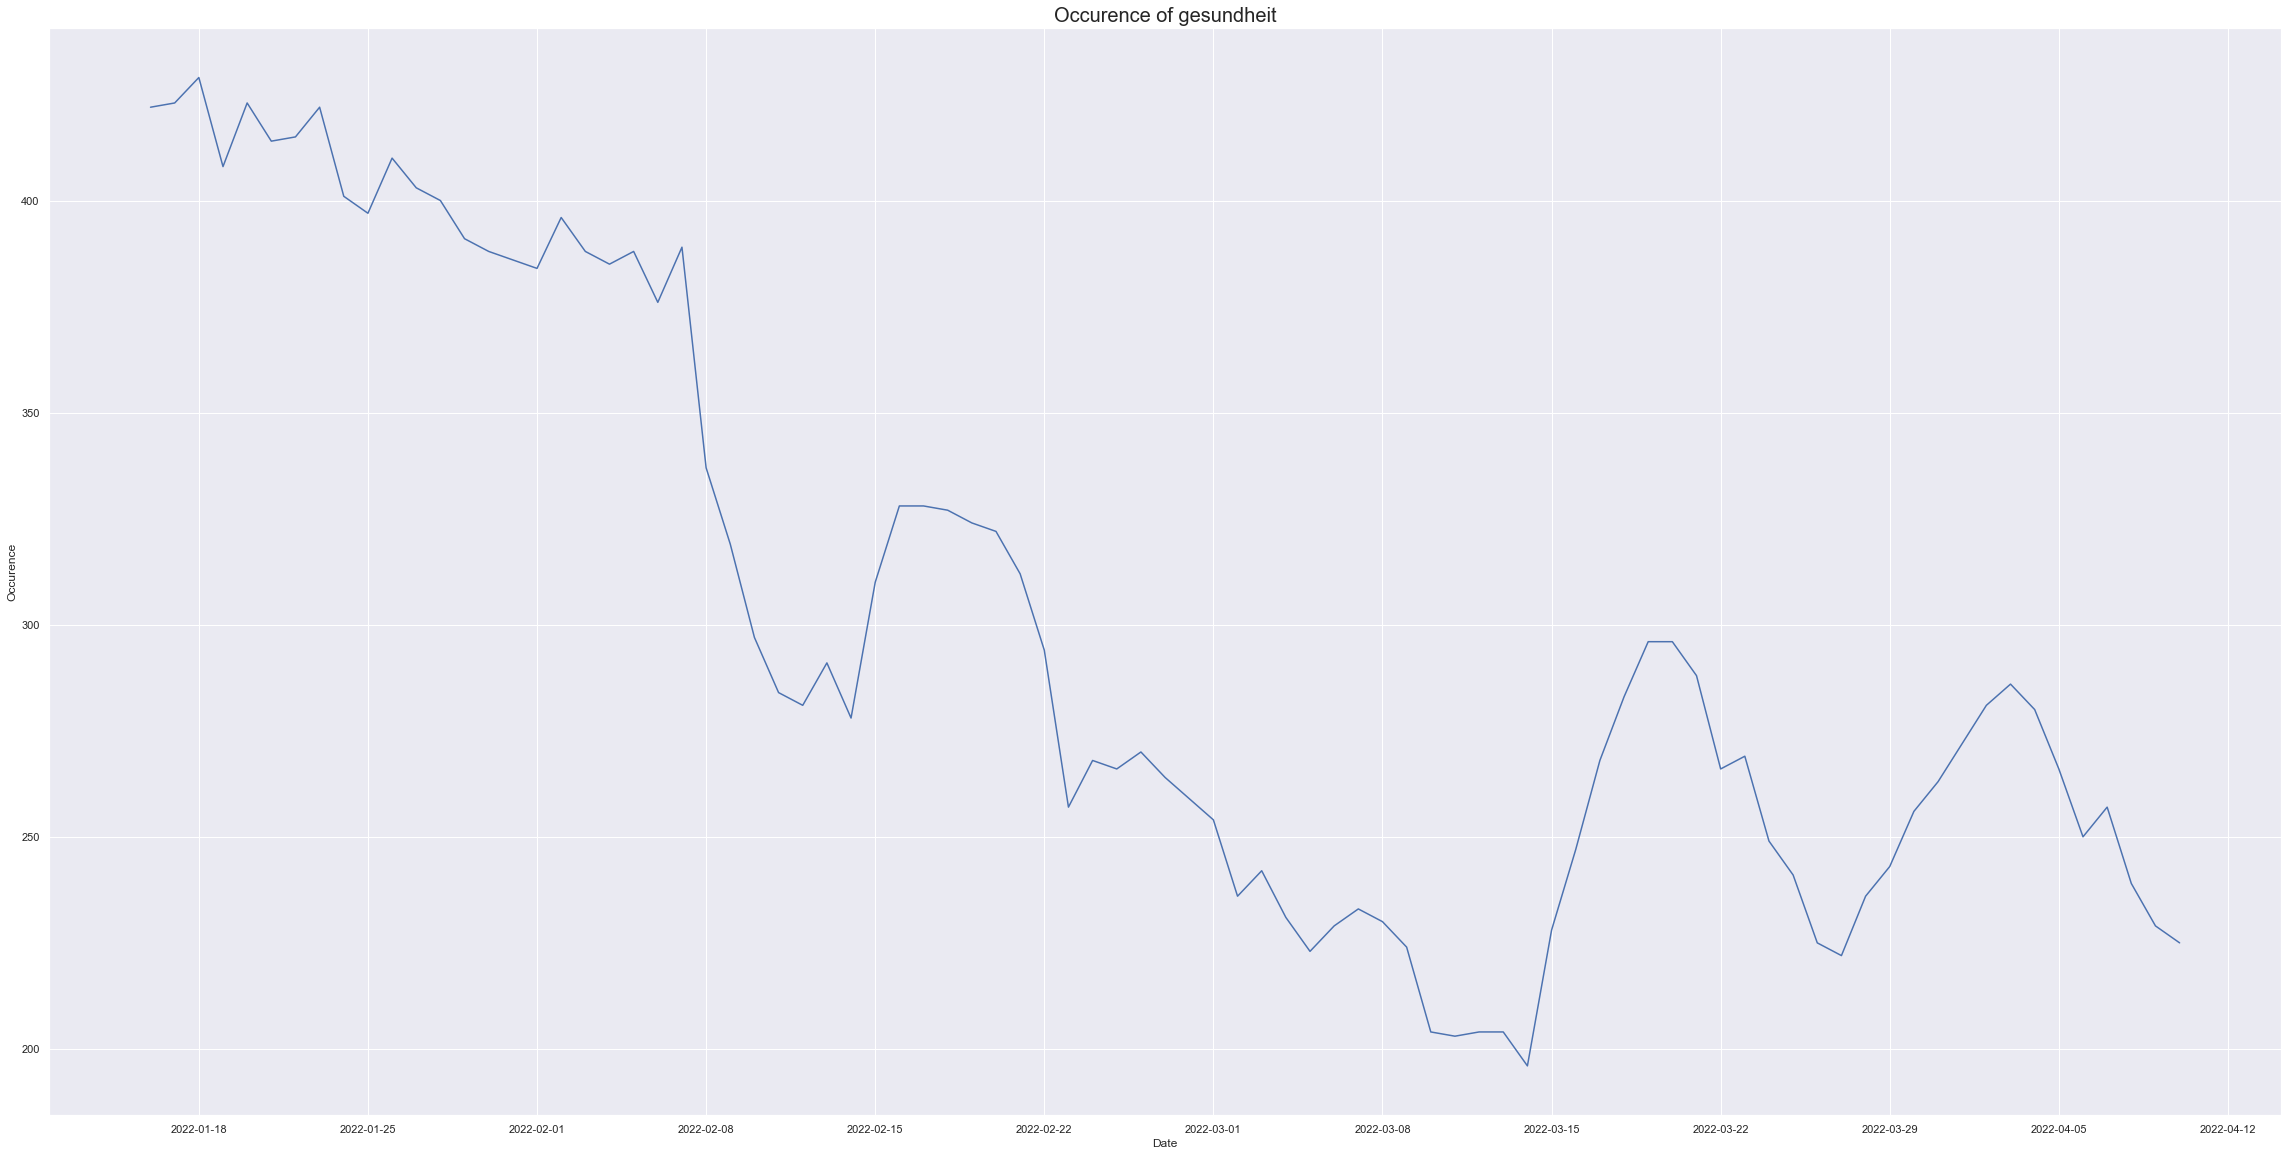

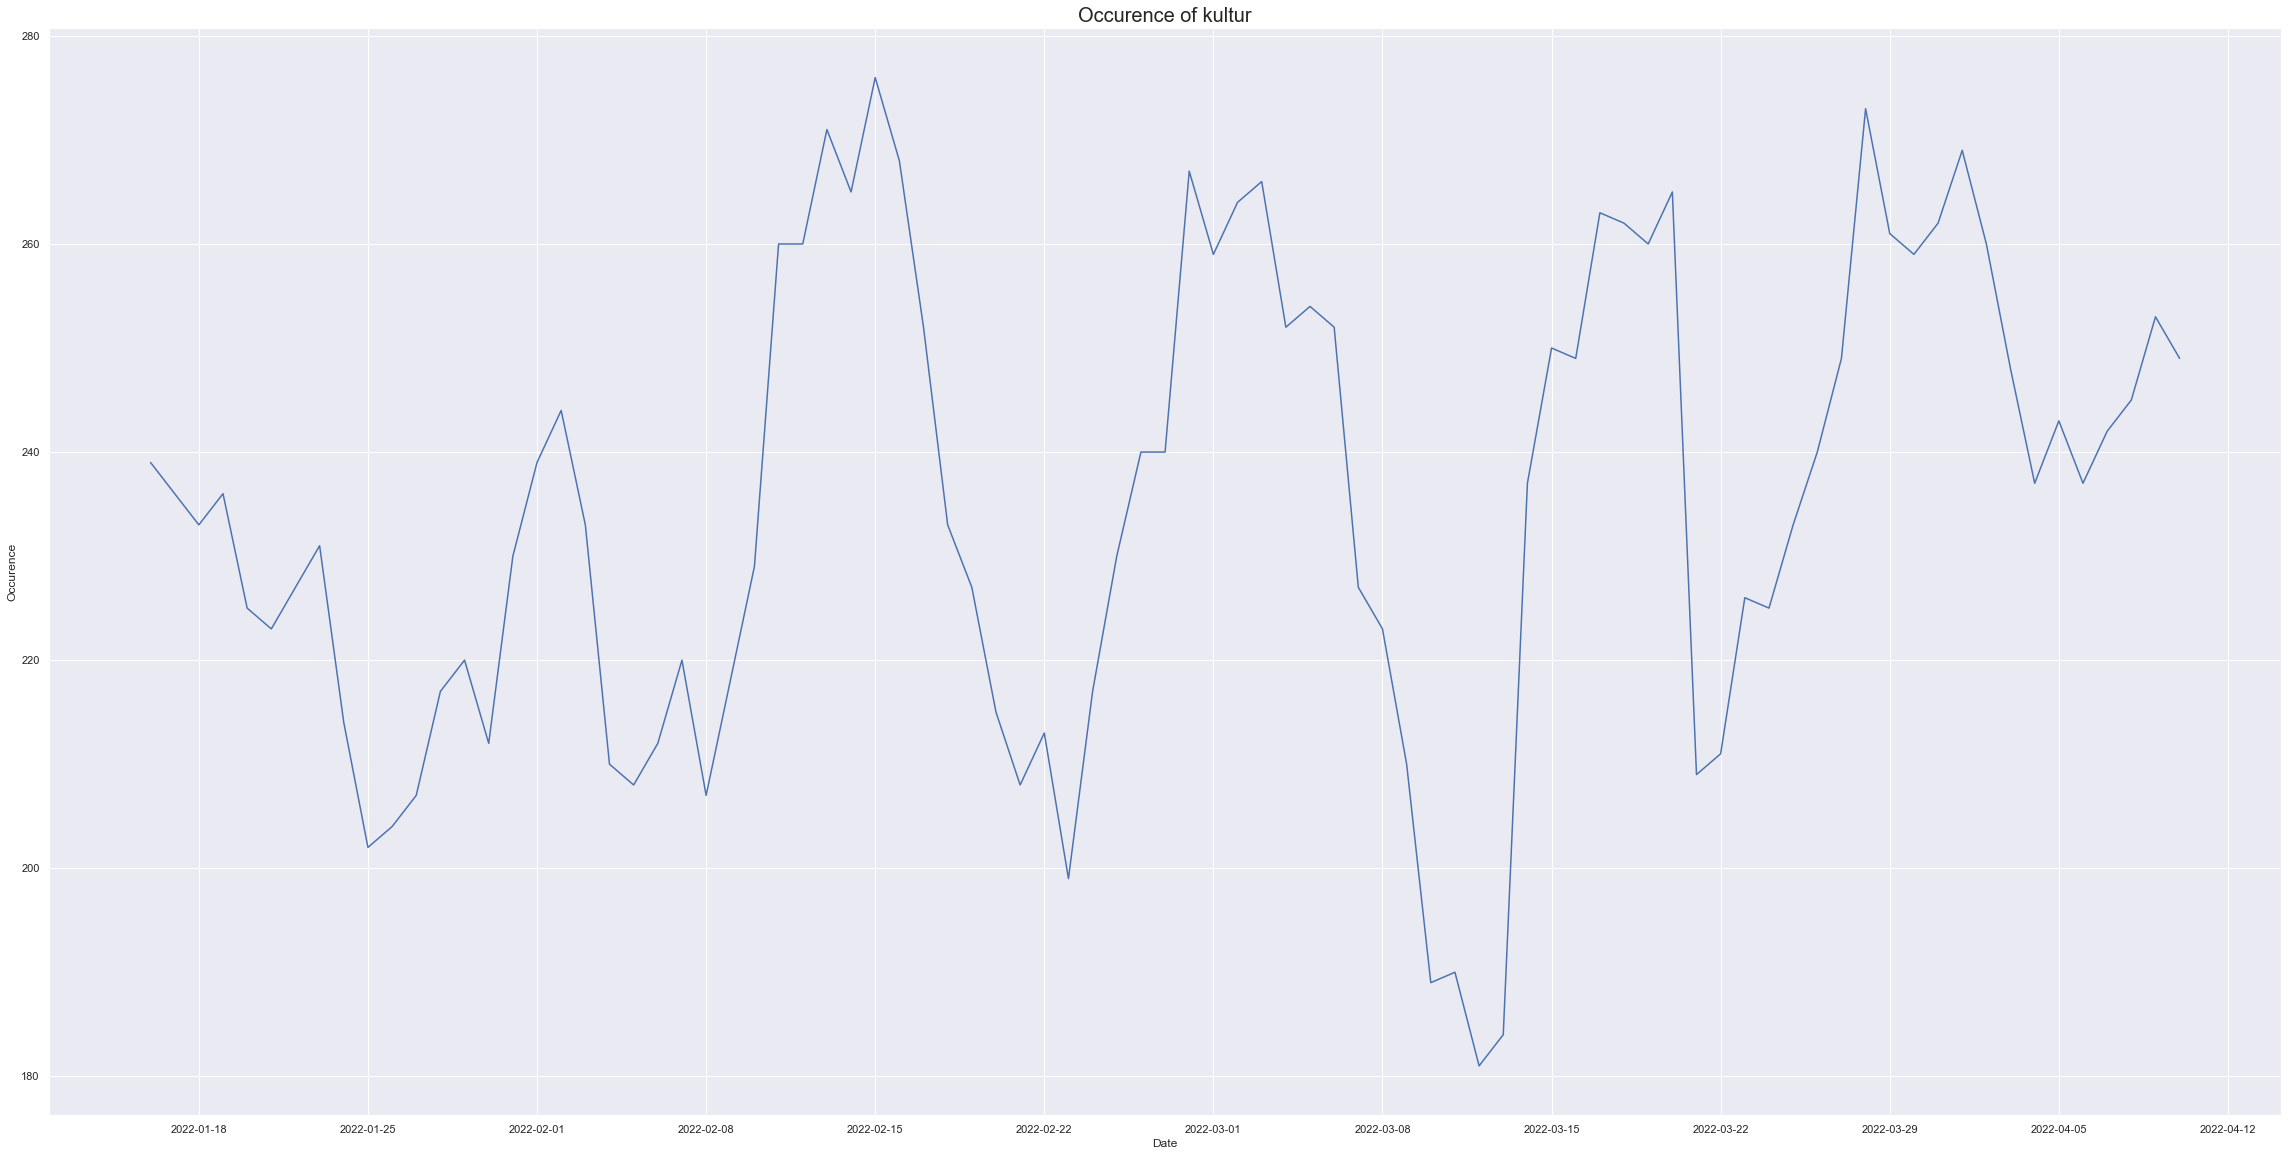

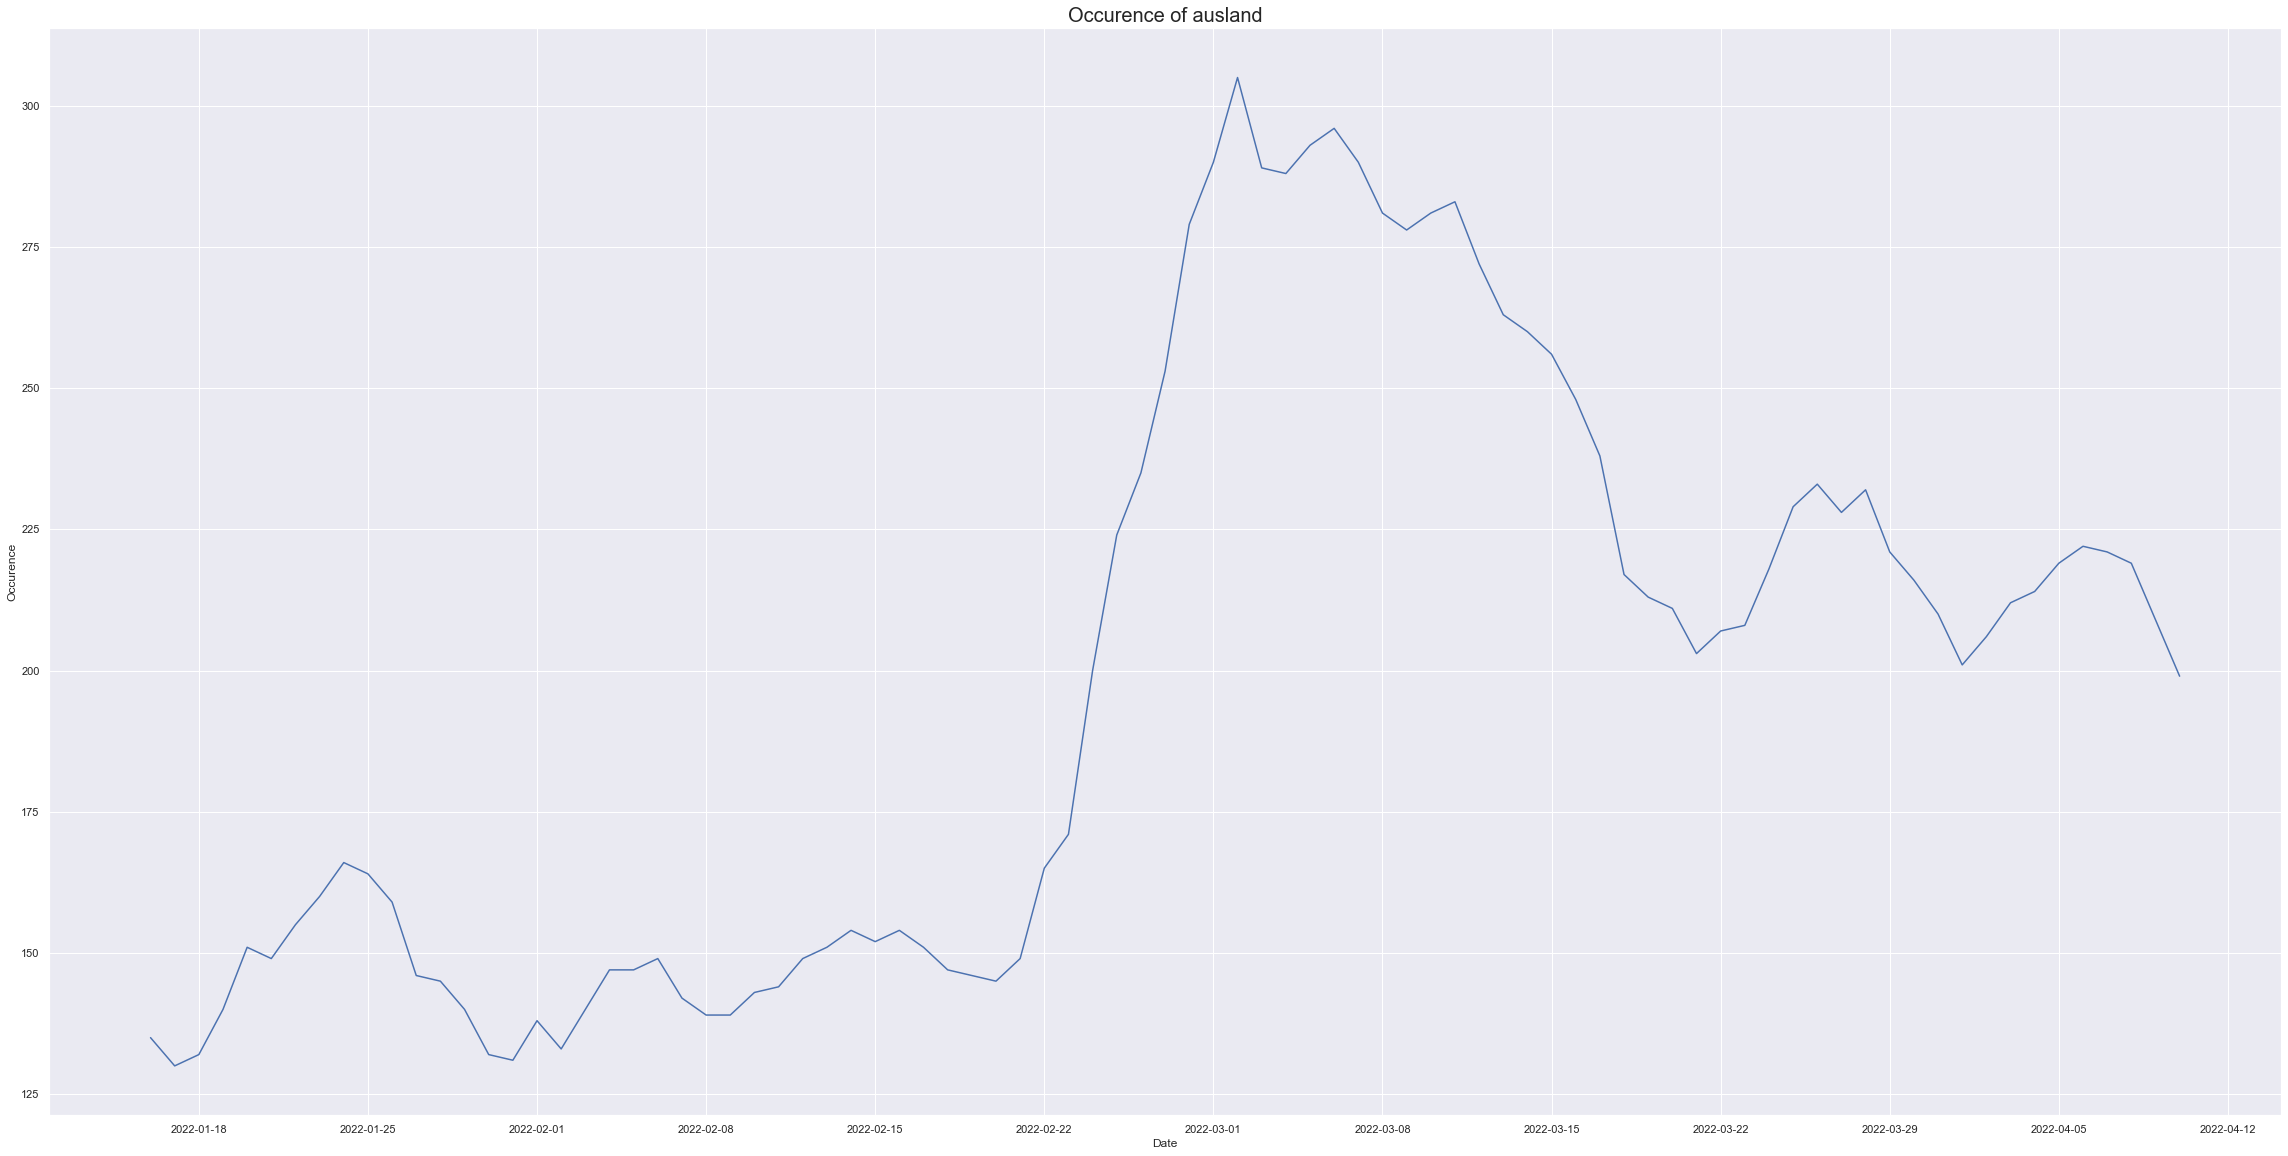

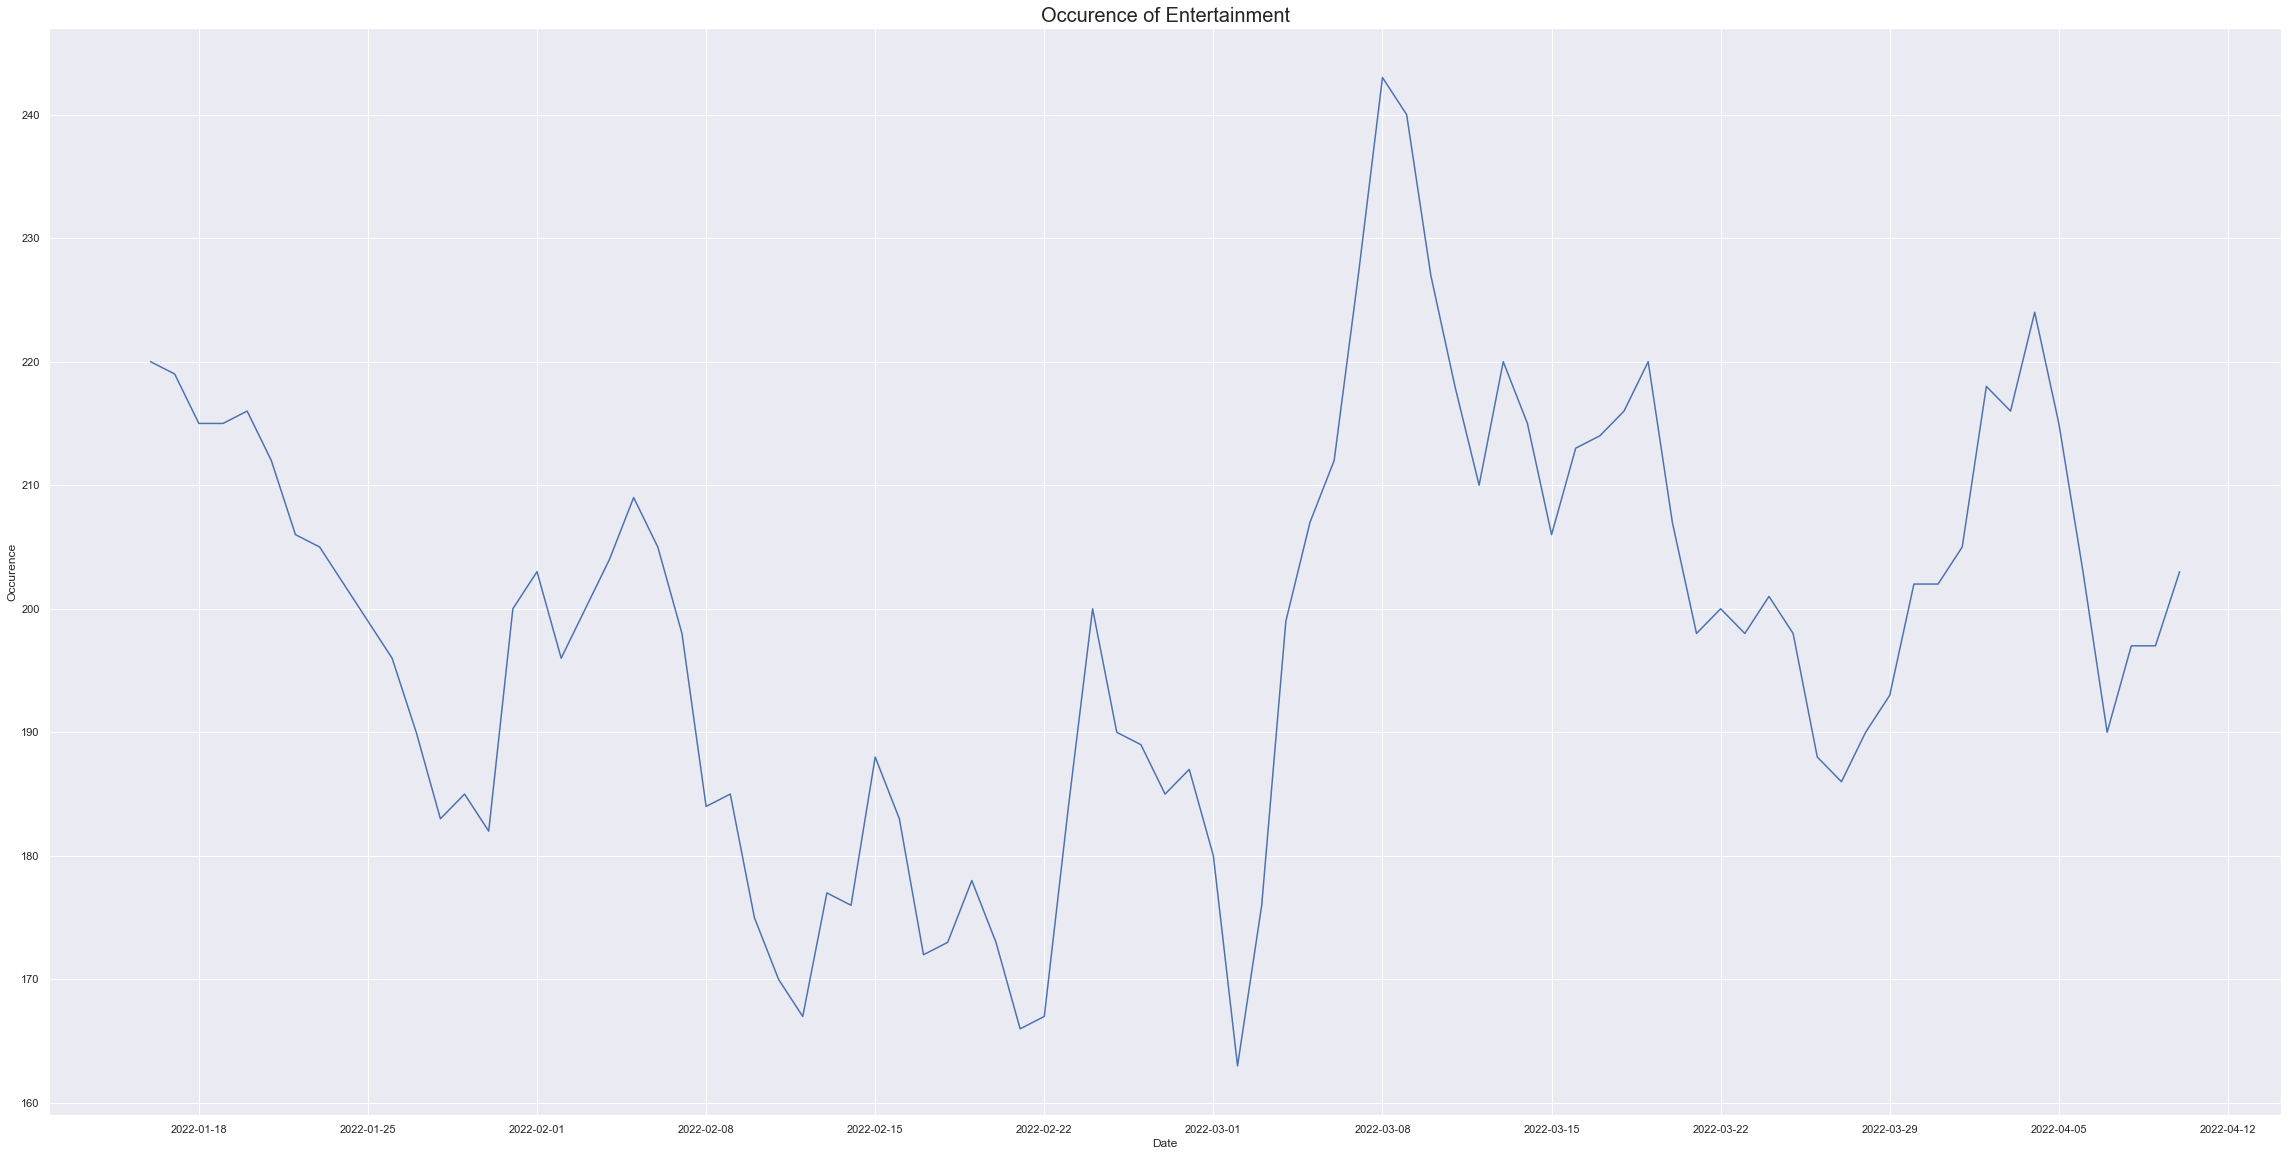

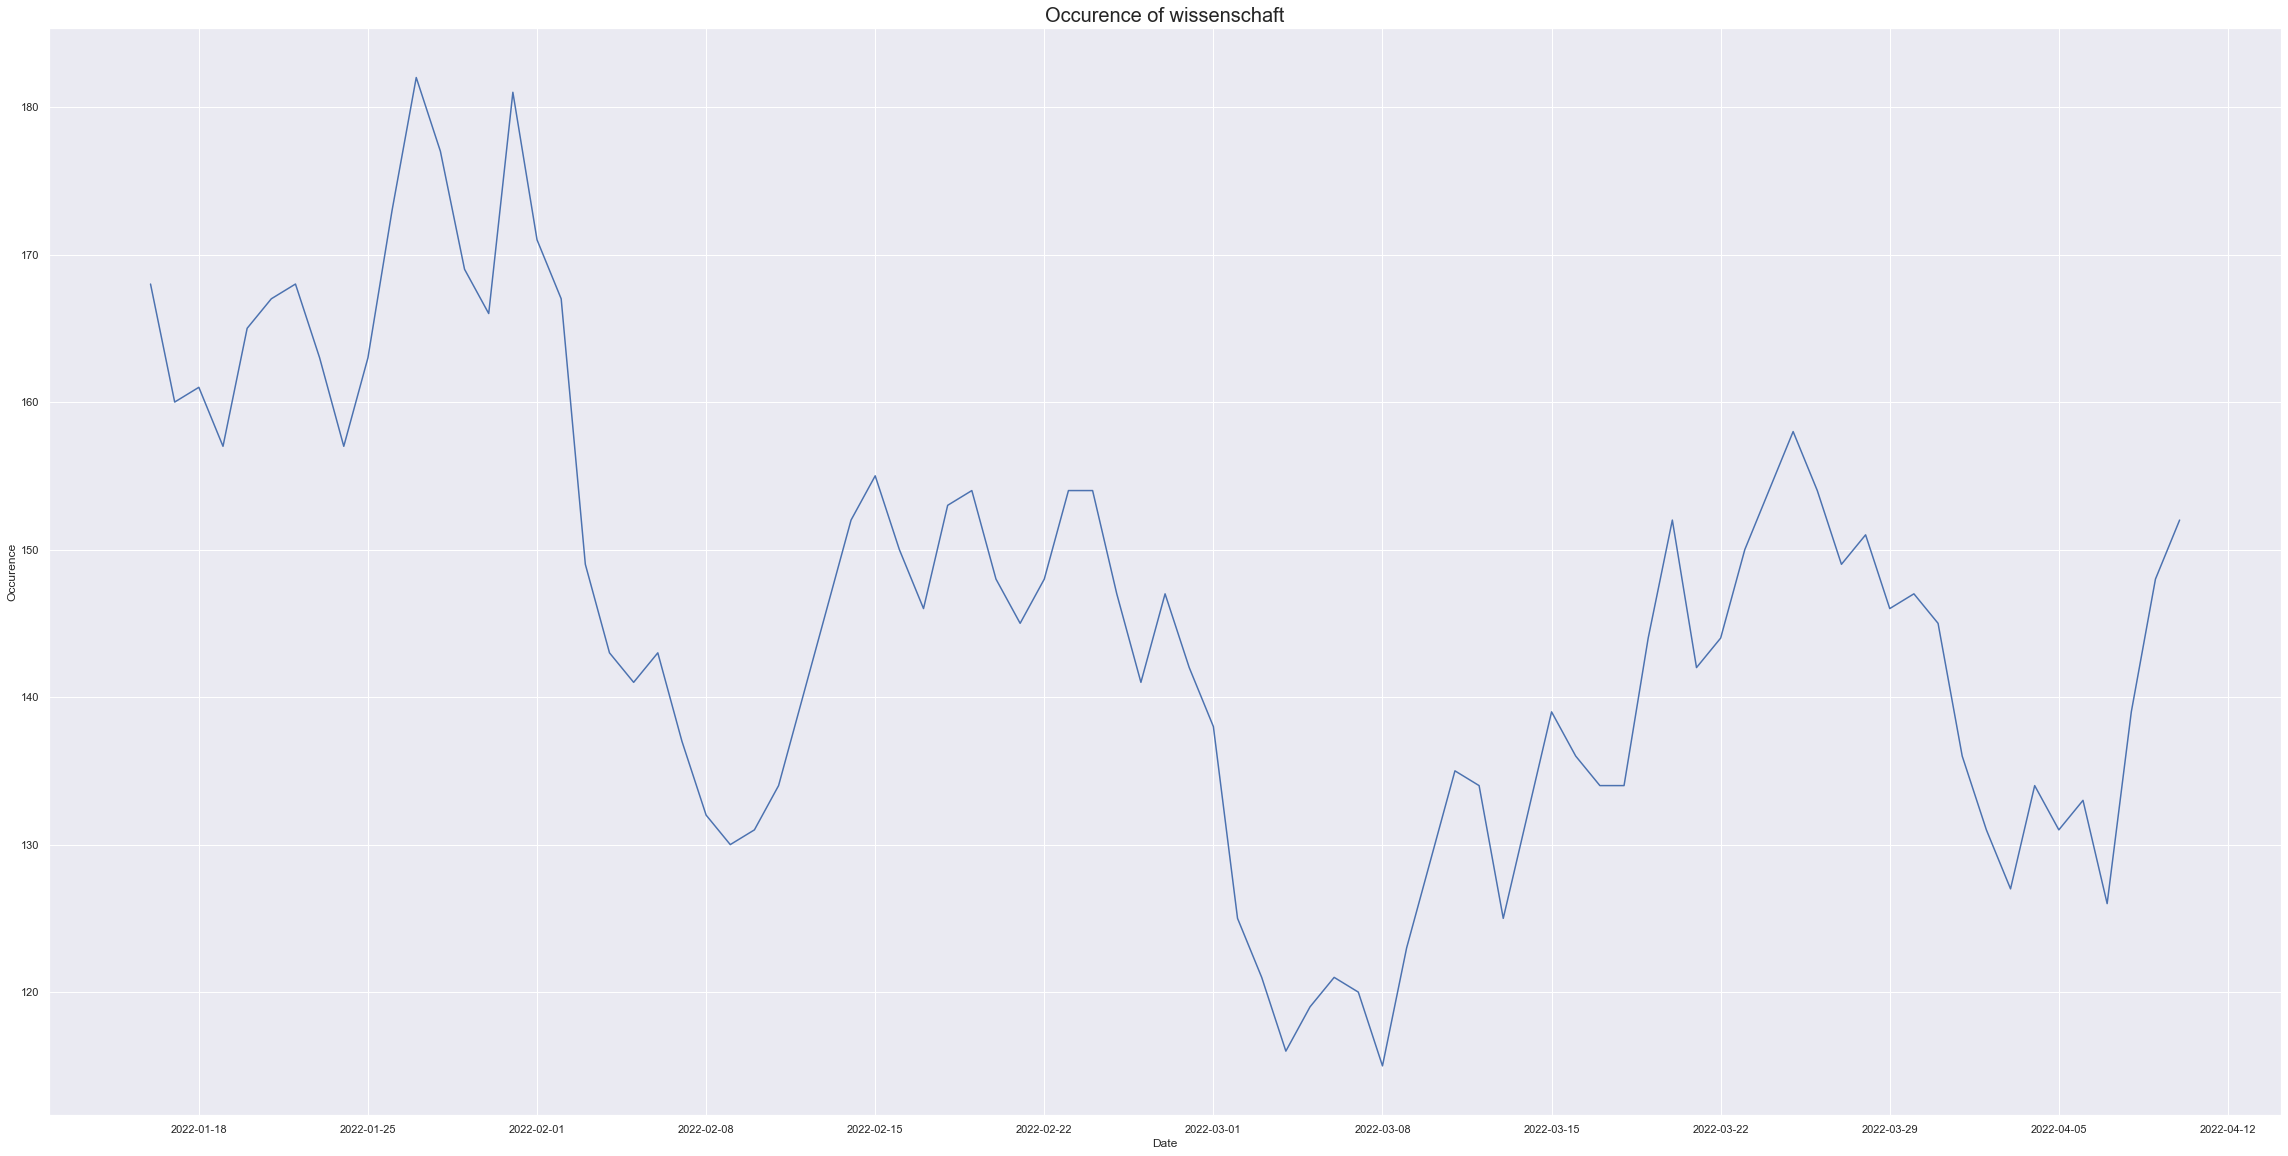

In [17]:
top_n_categories = DataFrame["Kategorie"].value_counts()[:10].index

for category in top_n_categories:
    plot =plot_categorie_over_time(DataFrame, category, True,False)

In [9]:
def plot_categorie_over_time(dataframe, Kategorie, save, vollständig):
    
    font_dict = {
        'size': 20,
        }
    
    DataFrame = dataframe[["Date_Info", "Kategorie"]]
    DataFrame = DataFrame.loc[DataFrame["Kategorie"] == Kategorie]
    
    DataFrame = DataFrame.pivot_table(index='Date_Info', columns='Kategorie', aggfunc='size') \
            .rename_axis(None, axis=1)
    DataFrame = DataFrame.rename(columns={Kategorie: f"Occurence of {Kategorie}"})
      
    filename_vollständig = "unvollständig"
    if vollständig is False:
        DataFrame = DataFrame['2022-01-10' : pd.to_datetime('today').normalize()]
        filename_vollständig = "vollständig"
        
    
    single_category = DataFrame.reset_index()
    single_category["Date_Info"] = single_category['Date_Info'].dt.date



    Column_name =f"Occurence of {Kategorie}"
    
    # Über datum summieren
    single_category = single_category.groupby(by=[single_category["Date_Info"]]).sum()

    single_category[Column_name] = single_category[Column_name].rolling(7).sum()


        
    
    
    ax = sns.lineplot(x="Date_Info", y=Column_name, data=single_category,ci=None)
    ax.set(xlabel='Date', ylabel='Occurence')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

    plt.title(Column_name, fontdict=font_dict)
    if save is True:
        plt.savefig(f"/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Plots/Kategorien/{Column_name}" + "lineplot_" + filename_vollständig + ".png")

    plt.show()

    return plt

# Categories - Bar Chart

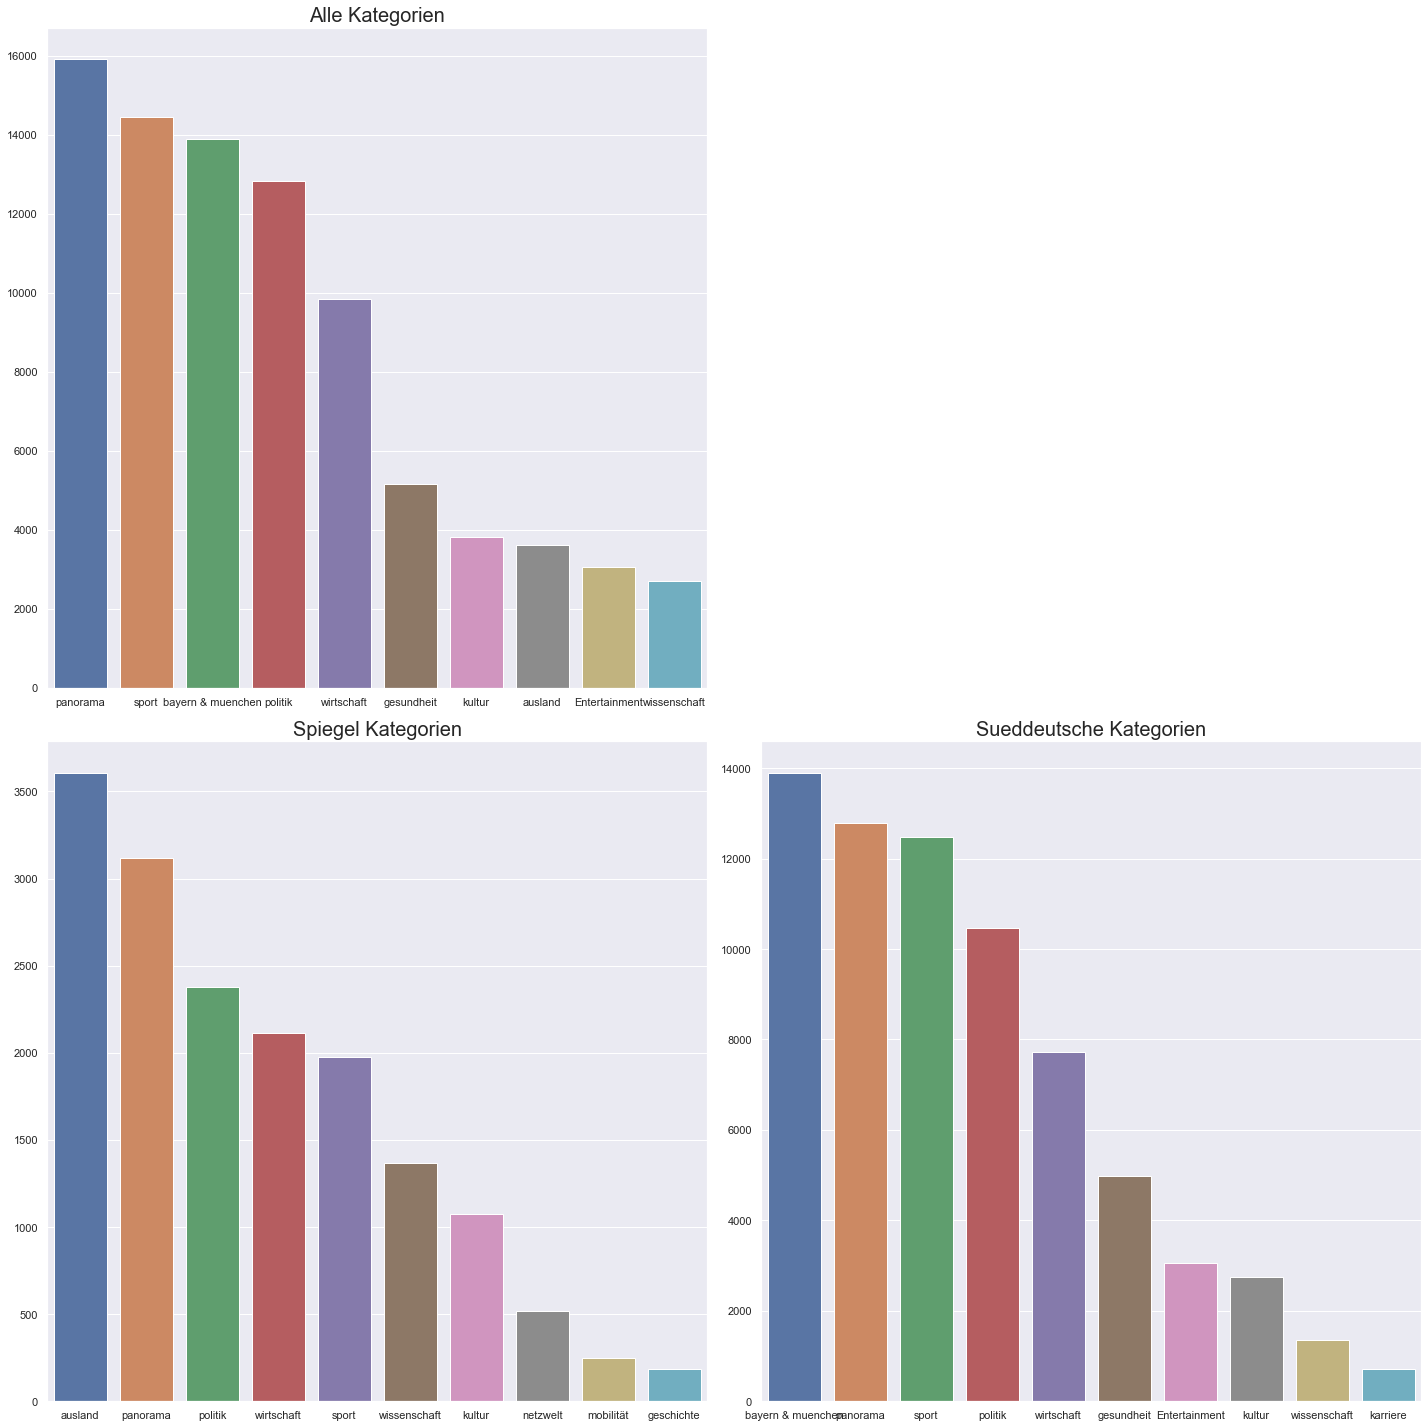

In [18]:
Sueddeutsche_Values = DataFrame.loc[DataFrame["News_page"] == "Sueddeutsche" ]["Kategorie"].value_counts()[:10]

Spiegel_Values = DataFrame.loc[DataFrame["News_page"] == "Spiegel" ]["Kategorie"].value_counts()[:10]

Overall_Values = DataFrame["Kategorie"].value_counts()[:10]


# define size
sns.set(rc={'figure.figsize':(20,20)})

font_dict = {
        'size': 20,
        }

# plot 1
# declaring data
values = Overall_Values.values
keys = Overall_Values.keys()

plt.subplot(2, 2, 1)

plt.title("Alle Kategorien",fontdict=font_dict)

# plotting data on chart
sns.barplot(x = keys,y=values)


# plot 2
# declaring data
values = Spiegel_Values.values
keys = Spiegel_Values.keys()

plt.subplot(2, 2, 3)

plt.title("Spiegel Kategorien", fontdict=font_dict)

# plotting data on chart
sns.barplot(x = keys,y=values)

# plot 3
# declaring data
values = Sueddeutsche_Values.values
keys = Sueddeutsche_Values.keys()

plt.subplot(2, 2, 4)

plt.title("Sueddeutsche Kategorien",fontdict=font_dict)

# plotting data on chart
sns.barplot(x = keys,y=values)

# displaying chart
plt.tight_layout()  

# save fig    
plt.savefig("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Plots/Kategorien/Kategorien_Verteilung_BarChart.png")





# Categories - Piechart

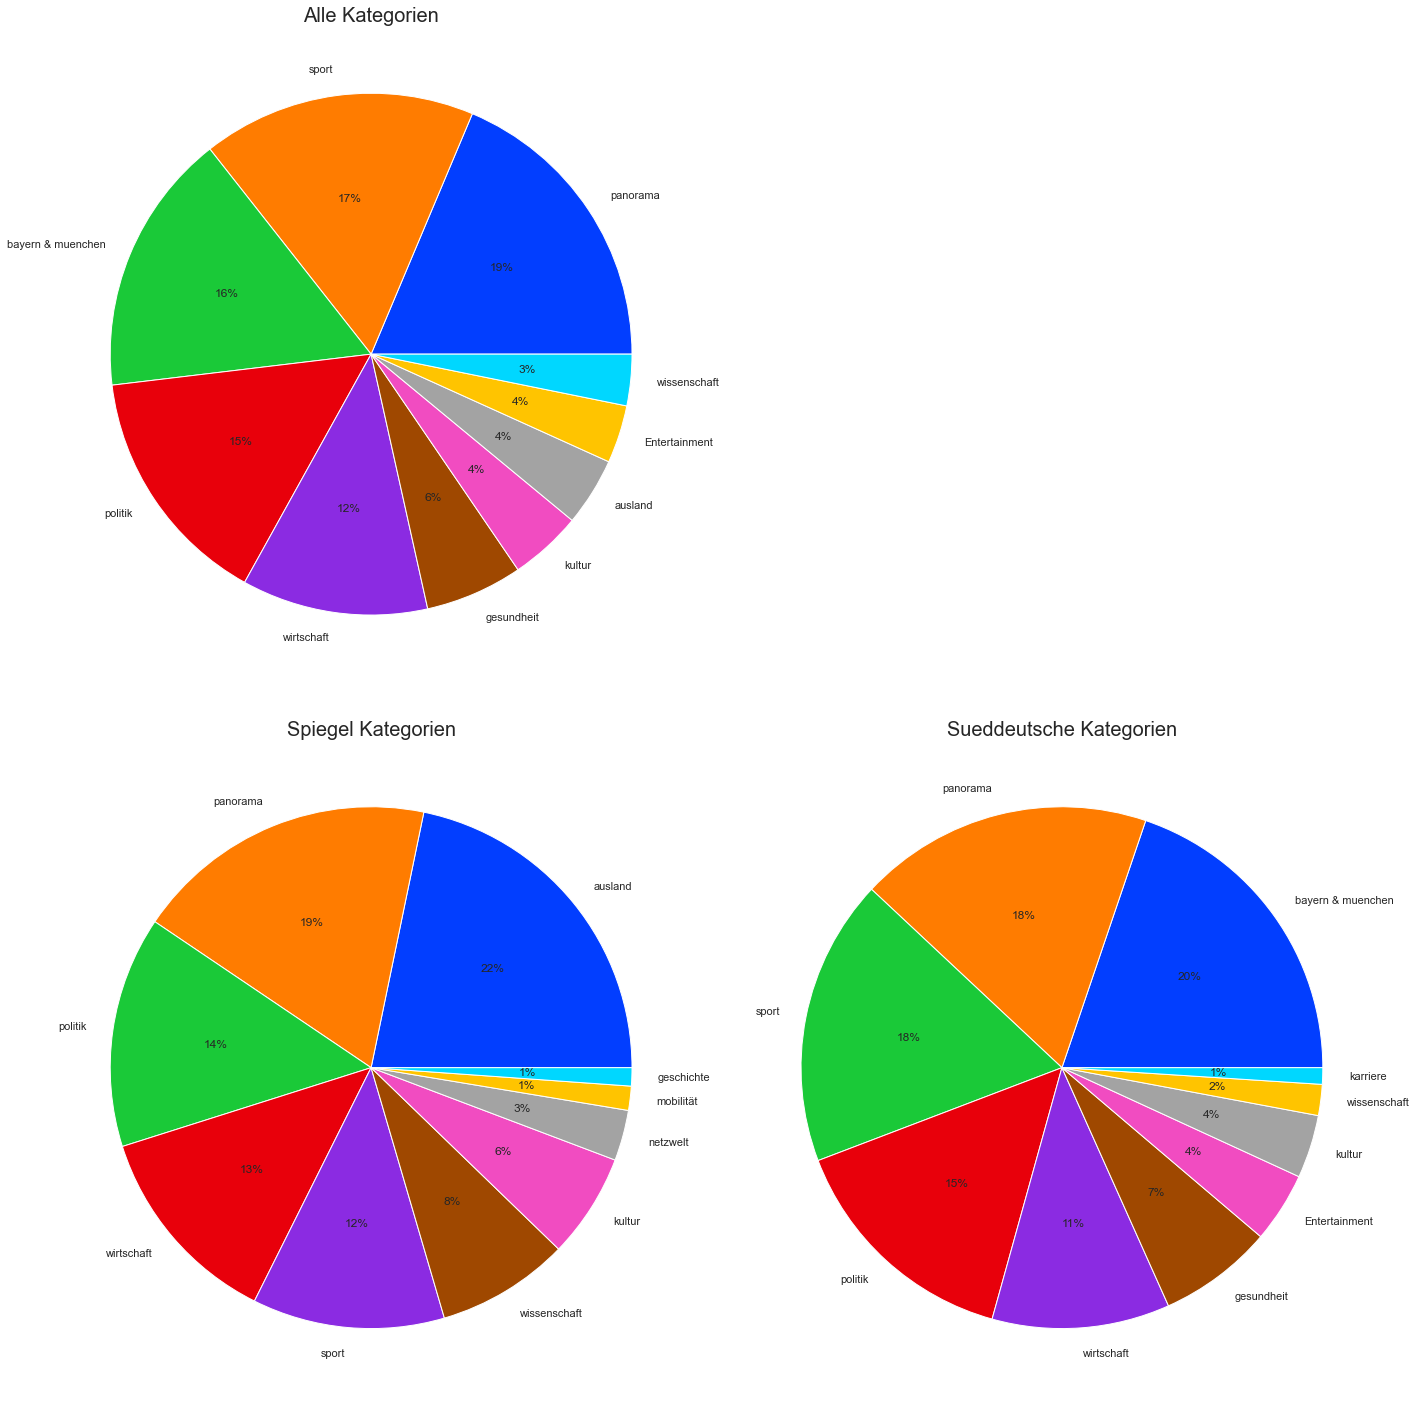

In [19]:
Sueddeutsche_Values = DataFrame.loc[DataFrame["News_page"] == "Sueddeutsche" ]["Kategorie"].value_counts()[:10]

Spiegel_Values = DataFrame.loc[DataFrame["News_page"] == "Spiegel" ]["Kategorie"].value_counts()[:10]

Overall_Values = DataFrame["Kategorie"].value_counts()[:10]


# define Seaborn color palette to use
palette_color = sns.color_palette('bright')



font_dict = {
        'size': 20,
        }


radius = 1

# plot 1
# declaring data
values = Overall_Values.values
keys = Overall_Values.keys()

plt.subplot(2, 2, 1)

plt.title("Alle Kategorien",fontdict=font_dict)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%',radius = radius)


# plot 2
# declaring data
values = Spiegel_Values.values
keys = Spiegel_Values.keys()

plt.subplot(2, 2, 3)

plt.title("Spiegel Kategorien", fontdict=font_dict)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%',radius = radius)


# plot 3
# declaring data
values = Sueddeutsche_Values.values
keys = Sueddeutsche_Values.keys()

plt.subplot(2, 2, 4)

plt.title("Sueddeutsche Kategorien",fontdict=font_dict)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%',radius = radius)
    
# displaying chart
plt.tight_layout()  

# save fig    
plt.savefig("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Plots/Kategorien/Kategorien_Verteilung_PieChart.png")





# Helper

In [3]:
def set_correct_datatypes(dataframe):
    dataframe["Zugriff_Datum"] = pd.to_datetime(dataframe["Zugriff_Datum"], format='%Y-%m-%d')
    dataframe["Date_Info"] = pd.to_datetime(dataframe["Date_Info"], format='%Y-%m-%d')
    return dataframe